In [3]:
import lib.db_connector
import pandas as pd
import seaborn as sns

#Set to true if database connection is not available
local = True

In [4]:
if not local:
    db = lib.db_connector.DbConnector(db_name = 'speakql_study', verbose = False)
    query = open("./queries/speakql_feature_usage.sql").read()
    attempts_df = db.do_single_select_query_into_dataframe(query)
    attempts_df.to_excel('./data/df/feature-usage-analysis-attempts-df.xlsx')
else:
    attempts_df = pd.read_excel('./data/df/feature-usage-analysis-attempts-df.xlsx')
attempts_df

,Unnamed: 0,idattemptsubmission,idparticipant,idsession,idquery,idstep,audiofilename,attemptnum,iscorrect,total_time,...,used_synonyms,expression_ordering_possible,used_expression_ordering,mod_ordering_possible,used_mod_ordering,natural_functions_possible,used_natural_functions,unbundling_possible,used_unbundling,has_min_kws
0,0,240,1,39,1,1,username-participant1_queryid-1_session-39_ste...,1,1,98,...,1,1,0,0,0,0,0,0,0,1
1,1,241,1,39,5,2,username-participant1_queryid-5_session-39_ste...,1,0,160,...,0,1,0,0,0,1,1,0,0,1
2,2,242,1,39,5,2,username-participant1_queryid-5_session-39_ste...,2,1,207,...,0,1,0,0,0,1,1,0,0,1
3,3,243,1,39,16,3,username-participant1_queryid-16_session-39_st...,1,1,497,...,0,1,1,0,0,0,0,1,1,1
4,4,247,1,39,2,7,username-participant1_queryid-2_session-39_ste...,1,1,75,...,1,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,446,1248,29,66,14,16,username-participant23_queryid-14_session-66_s...,1,0,145,...,0,1,0,1,0,1,1,1,1,1
447,447,1249,29,66,14,16,username-participant23_queryid-14_session-66_s...,2,1,78,...,0,1,0,1,0,1,1,1,1,1
448,448,1250,29,66,15,17,username-participant23_queryid-15_session-66_s...,1,1,153,...,0,1,0,1,0,1,1,1,1,1
449,449,1251,29,66,17,18,username-participant23_queryid-17_session-66_s...,1,0,266,...,0,1,0,0,0,0,0,1,1,1


In [3]:
attempts_df.where(attempts_df.used_unbundling == 1).dropna(how = 'all').to_excel('no_unbundling_used.xlsx')

### Aggregate Feature Usage Analysis

In [4]:
used_df = pd.melt(
    attempts_df, id_vars =['idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'used_synonyms',
        'used_expression_ordering',
        'used_mod_ordering',
        'used_natural_functions',
        'used_unbundling'
    ]
)

possible_df = pd.melt(
    attempts_df, id_vars =['idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'synonyms_possible',
        'expression_ordering_possible',
        'mod_ordering_possible',
        'natural_functions_possible',
        'unbundling_possible'
    ]
)

                   variable  used  possible  perc_usage
0  used_expression_ordering    51       451    0.113082
1         used_mod_ordering     3       111    0.027027
2    used_natural_functions   217       258    0.841085
3             used_synonyms   231       451    0.512195
4           used_unbundling   229       312    0.733974


<AxesSubplot:xlabel='variable'>

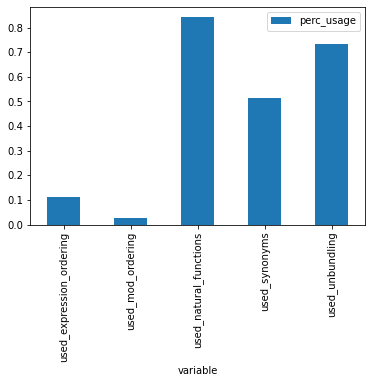

In [5]:
used_sum = used_df[['variable', 'value']].groupby(
    ['variable']
).sum()

possible_sum = possible_df[['variable', 'value']].groupby(
    ['variable']
).sum()

sum_compare = used_sum
sum_compare = sum_compare.rename(columns = {'value' : 'used'}).reset_index()
sum_compare['possible'] = possible_sum.reset_index().value

sum_compare['perc_usage'] = sum_compare.used / sum_compare.possible

print(sum_compare)
sum_compare[['variable', 'perc_usage']].plot.bar(x = 'variable', y = 'perc_usage')


### Participant Feature Usage Analysis

In [6]:
used_df = pd.melt(
    attempts_df, id_vars =['speakql_first', 'idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'used_synonyms',
        'used_expression_ordering',
        'used_mod_ordering',
        'used_natural_functions',
        'used_unbundling'
    ]
)

possible_df = pd.melt(
    attempts_df, id_vars =['speakql_first','idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'synonyms_possible',
        'expression_ordering_possible',
        'mod_ordering_possible',
        'natural_functions_possible',
        'unbundling_possible'
    ]
)

print(used_df)
print(possible_df)


      speakql_first  idparticipant  idsession  idstep         variable  value
0                 1              1         39       1    used_synonyms      1
1                 1              1         39       2    used_synonyms      0
2                 1              1         39       2    used_synonyms      0
3                 1              1         39       3    used_synonyms      0
4                 1              1         39       7    used_synonyms      1
...             ...            ...        ...     ...              ...    ...
2250              1             29         66      16  used_unbundling      1
2251              1             29         66      16  used_unbundling      1
2252              1             29         66      17  used_unbundling      1
2253              1             29         66      18  used_unbundling      1
2254              1             29         66      18  used_unbundling      1

[2255 rows x 6 columns]
      speakql_first  idparticipant  ids

C:\Users\KYLEL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


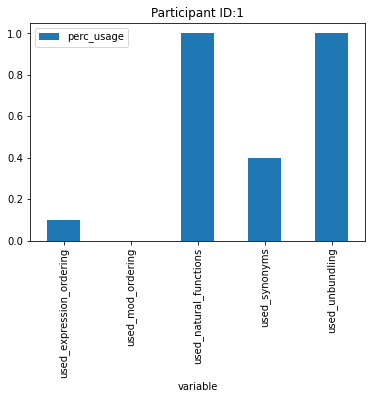

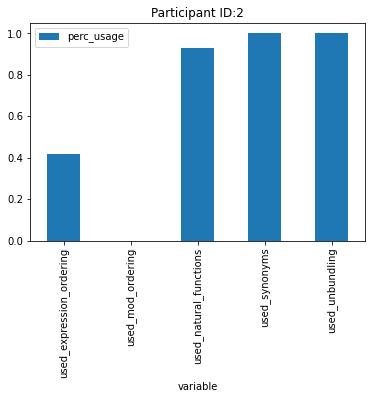

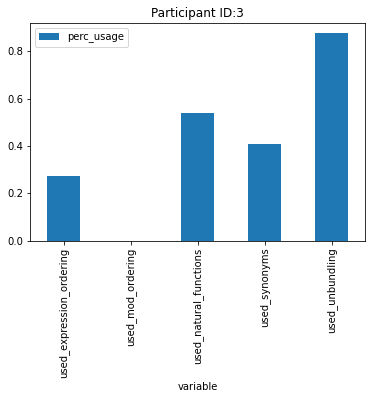

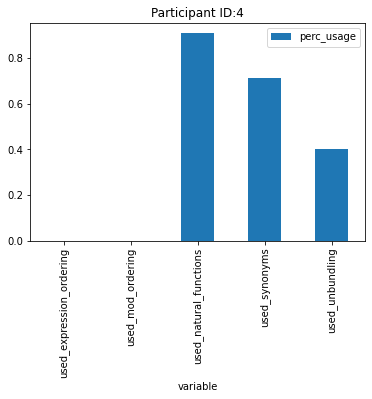

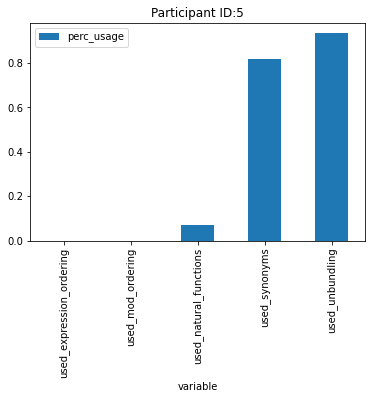

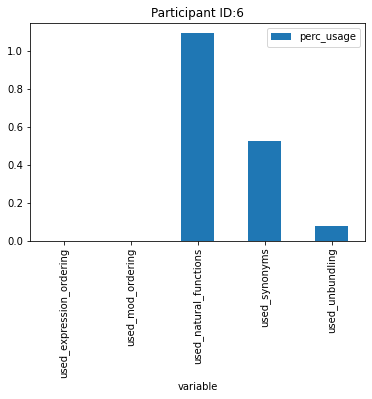

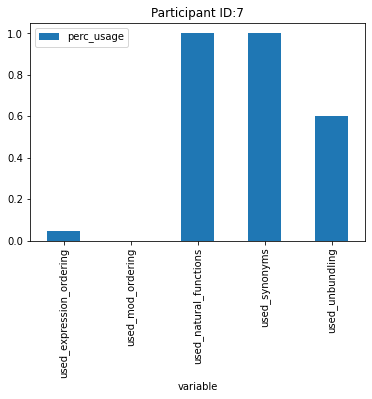

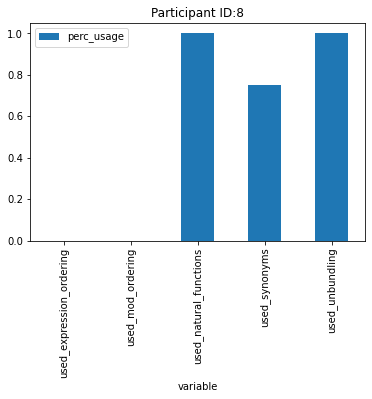

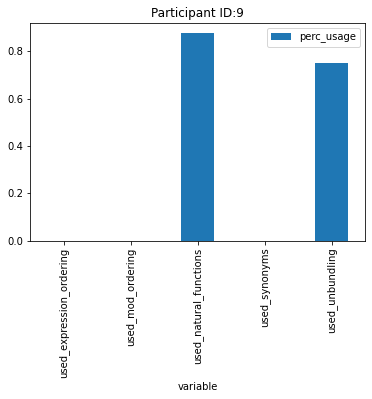

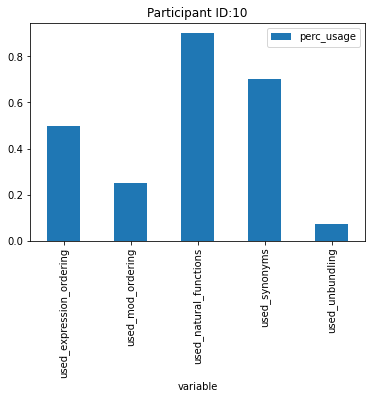

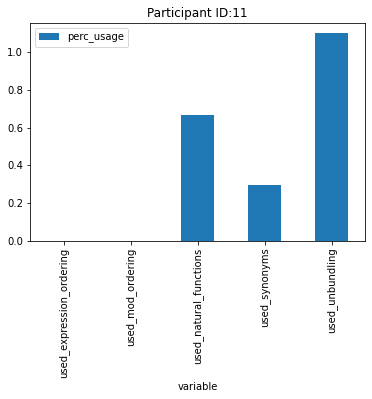

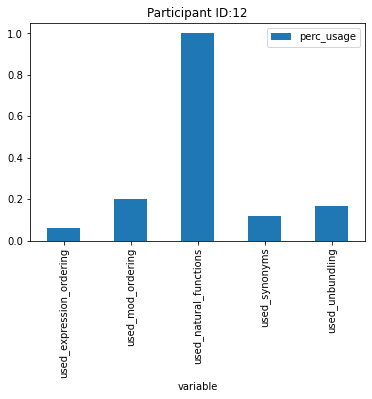

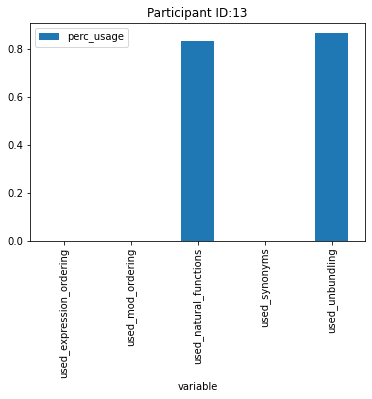

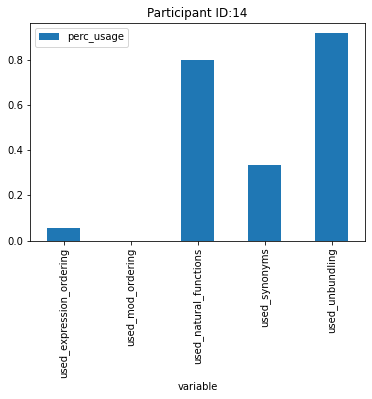

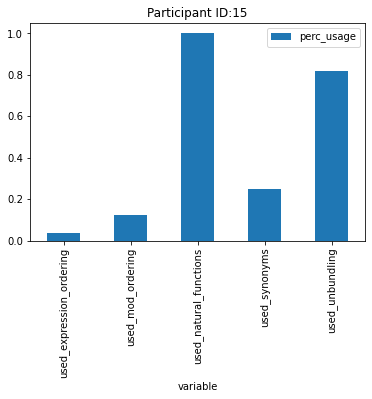

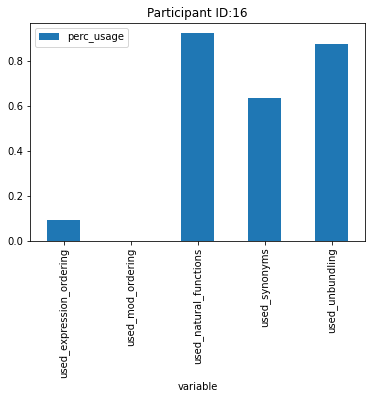

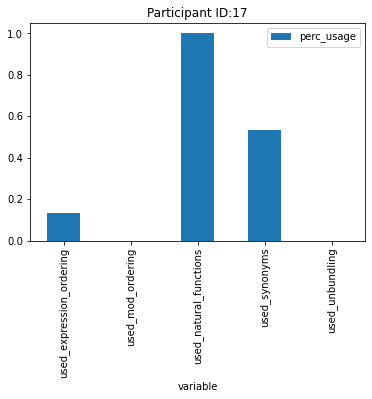

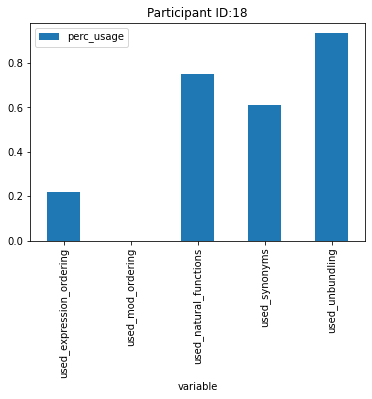

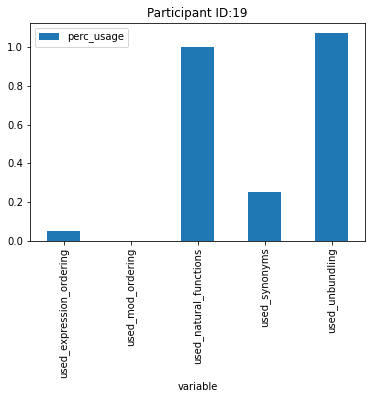

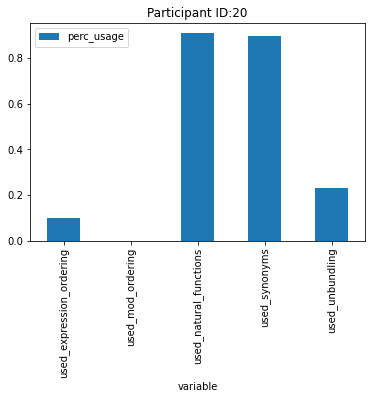

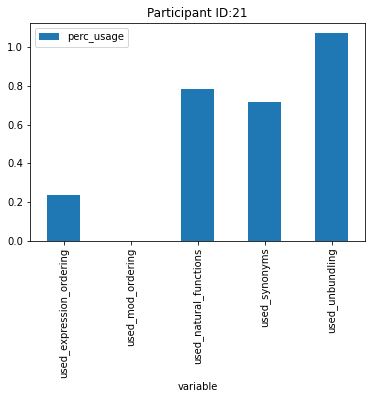

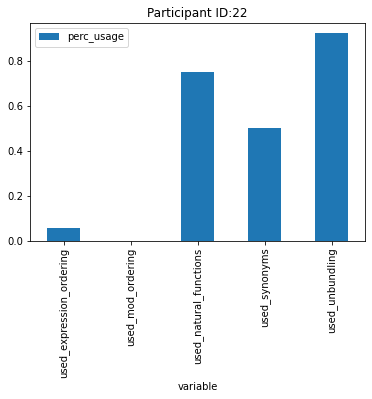

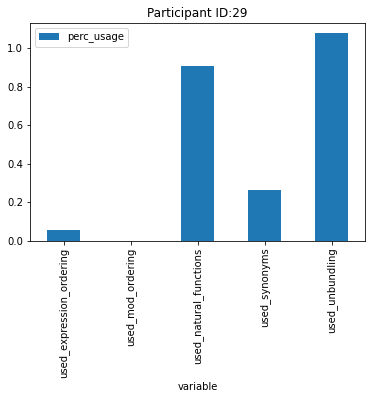

In [7]:
used_sum = used_df[['idparticipant', 'variable', 'value']].groupby(
    ['idparticipant', 'variable']
).sum()

possible_sum = possible_df[['idparticipant', 'variable', 'value']].groupby(
    ['idparticipant', 'variable']
).sum()

sum_compare = used_sum
sum_compare = sum_compare.rename(columns = {'value' : 'used'}).reset_index()
sum_compare['possible'] = possible_sum.reset_index().value

sum_compare['perc_usage'] = sum_compare.used / sum_compare.possible

participant_ids = sum_compare.idparticipant.unique()

for p_id in participant_ids:
    sum_compare.where(
        sum_compare.idparticipant == p_id
    ).dropna(
        how = 'all'
    )[['variable', 'perc_usage']].plot.bar(
        x = 'variable', y = 'perc_usage', title = ("Participant ID:" + str(p_id))
    )

### Feature usage by group (SpeakQL first vs. SQL first)

In [8]:
attempts_df.columns

Index(['idattemptsubmission', 'idparticipant', 'idsession', 'idquery',
       'idstep', 'audiofilename', 'attemptnum', 'iscorrect', 'total_time',
       'recording_time', 'planning_time', 'group_number', 'speakql_first',
       'transcript', 'synonyms_possible', 'used_synonyms',
       'expression_ordering_possible', 'used_expression_ordering',
       'mod_ordering_possible', 'used_mod_ordering',
       'natural_functions_possible', 'used_natural_functions',
       'unbundling_possible', 'used_unbundling', 'has_min_kws'],
      dtype='object')

In [9]:
used_df = pd.melt(
    attempts_df, id_vars =['speakql_first', 'idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'used_synonyms',
        'used_expression_ordering',
        'used_mod_ordering',
        'used_natural_functions',
        'used_unbundling'
    ]
)

possible_df = pd.melt(
    attempts_df, id_vars =['speakql_first', 'idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'synonyms_possible',
        'expression_ordering_possible',
        'mod_ordering_possible',
        'natural_functions_possible',
        'unbundling_possible'
    ]
)

used_sum = used_df[['speakql_first', 'variable', 'value']].groupby(
    ['speakql_first', 'variable']
).sum()

possible_sum = possible_df[['speakql_first', 'variable', 'value']].groupby(
    ['speakql_first', 'variable']
).sum()

sum_compare = used_sum
sum_compare = sum_compare.rename(columns = {'value' : 'used'}).reset_index()
sum_compare['possible'] = possible_sum.reset_index().value

sum_compare['perc_usage'] = sum_compare.used / sum_compare.possible

sum_compare

,speakql_first,variable,used,possible,perc_usage
0,0,used_expression_ordering,29,198,0.146465
1,0,used_mod_ordering,2,49,0.040816
2,0,used_natural_functions,103,112,0.919643
3,0,used_synonyms,123,198,0.621212
4,0,used_unbundling,69,137,0.503650
5,1,used_expression_ordering,22,253,0.086957
6,1,used_mod_ordering,1,62,0.016129
7,1,used_natural_functions,114,146,0.780822
8,1,used_synonyms,108,253,0.426877
9,1,used_unbundling,160,175,0.914286


#### Finding: Usage of unbundling if SQL first
It looks like people were much less likely to use the unbundling feature if they were in the group that used SQL first

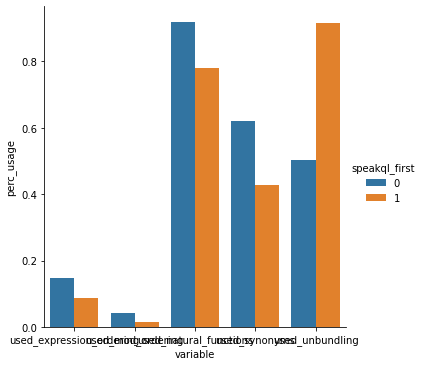

In [10]:
sns.catplot(
    data = sum_compare,
    kind = 'bar',
    x = 'variable',
    y = 'perc_usage',
    hue = 'speakql_first'
)

### Feature usage plotting


In [11]:
used_df = pd.melt(
    attempts_df, id_vars =['idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'used_synonyms',
        'used_expression_ordering',
        'used_mod_ordering',
        'used_natural_functions',
        'used_unbundling'
    ]
)

possible_df = pd.melt(
    attempts_df, id_vars =['idparticipant', 'idsession', 'idstep'], 
    value_vars = [
        'synonyms_possible',
        'expression_ordering_possible',
        'mod_ordering_possible',
        'natural_functions_possible',
        'unbundling_possible'
    ]
)

used_sum = used_df[['variable', 'value']].groupby(
    ['variable']
).sum()

possible_sum = possible_df[['variable', 'value']].groupby(
    ['variable']
).sum()

sum_compare = used_sum
sum_compare = sum_compare.rename(columns = {'value' : 'used'}).reset_index()
sum_compare['possible'] = possible_sum.reset_index().value

sum_compare['perc_usage'] = sum_compare.used / sum_compare.possible

sum_compare

,variable,used,possible,perc_usage
0,used_expression_ordering,51,451,0.113082
1,used_mod_ordering,3,111,0.027027
2,used_natural_functions,217,258,0.841085
3,used_synonyms,231,451,0.512195
4,used_unbundling,229,312,0.733974


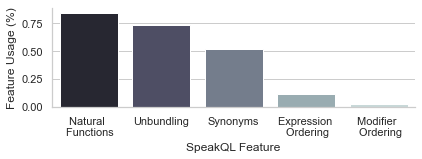

In [21]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data = sum_compare.sort_values(by='perc_usage', ascending=False),
    kind = 'bar',
    x = 'variable',
    y = 'perc_usage',
    aspect = 3,
    height=2,
    palette='bone'
)
g.set_axis_labels("SpeakQL Feature","Feature Usage (%)")
g.set_xticklabels(
    ['Natural \n Functions', 'Unbundling', 'Synonyms', 'Expression \n Ordering', 'Modifier \n Ordering'], 
    rotation = 0)
g.savefig('./feature_usage.pdf', dpi=300)